# NATMI 

In [1]:
lib = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/'
import sys
sys.path.append(lib)
from utilities.package_importing import *
import scipy.stats as stats

### All pairs:

In [2]:
ROOT_PATH = r'/storage/md_keren/shitay/outputs/NATMI/tumor_CD8_myeloid/executions/21.3.22'
FILE = 'Edges_lrc2p.csv'
df = pd.read_csv(join(ROOT_PATH, FILE))

In [3]:
df#.sort_values('Receptor detection rate', ascending = False).iloc[:, 4:]

,Sending cluster,Ligand symbol,Receptor symbol,Target cluster,Ligand-expressing cells,Ligand detection rate,Ligand average expression value,Ligand total expression value,Ligand derived specificity of average expression value,Ligand derived specificity of total expression value,Receptor-expressing cells,Receptor detection rate,Receptor average expression value,Receptor total expression value,Receptor derived specificity of average expression value,Receptor derived specificity of total expression value,Edge average expression weight,Edge average expression derived specificity,Edge total expression weight,Edge total expression derived specificity
0,CD8_cluster_1,A2M,LRP1,CD8_cluster_1,16,0.004857,0.012162,40.062253,0.000576,0.000810,7,0.002125,0.005382,17.727322,0.000285,0.000801,0.000065,1.639904e-07,710.196472,6.487959e-07
1,CD8_cluster_1,A2M,LRP1,CD8_cluster_2,16,0.004857,0.012162,40.062253,0.000576,0.000810,4,0.004657,0.004167,3.579098,0.000220,0.000162,0.000051,1.269636e-07,143.386725,1.309901e-07
2,CD8_cluster_1,A2M,LRP1,CD8_cluster_3,16,0.004857,0.012162,40.062253,0.000576,0.000810,7,0.003047,0.007560,17.364813,0.000400,0.000785,0.000092,2.303605e-07,695.673548,6.355286e-07
3,CD8_cluster_1,A2M,LRP1,CD8_cluster_4,16,0.004857,0.012162,40.062253,0.000576,0.000810,2,0.000787,0.000999,2.537713,0.000053,0.000115,0.000012,3.043244e-08,101.666519,9.287687e-08
4,CD8_cluster_1,A2M,LRP1,CD8_cluster_5,16,0.004857,0.012162,40.062253,0.000576,0.000810,19,0.007689,0.015749,38.915166,0.000833,0.001759,0.000192,4.798937e-07,1559.029235,1.424242e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995531,Myeloid_cluster_9,ZP3,MERTK,Myeloid_cluster_5,44,0.035743,0.024053,29.609107,0.028669,0.014232,208,0.282993,0.511512,375.961074,0.131121,0.093779,0.012303,3.759137e-03,11131.871832,1.334656e-03
995532,Myeloid_cluster_9,ZP3,MERTK,Myeloid_cluster_6,44,0.035743,0.024053,29.609107,0.028669,0.014232,36,0.041958,0.111442,95.617402,0.028567,0.023851,0.002681,8.189968e-04,2831.145932,3.394403e-04
995533,Myeloid_cluster_9,ZP3,MERTK,Myeloid_cluster_7,44,0.035743,0.024053,29.609107,0.028669,0.014232,45,0.092402,0.263472,128.311075,0.067538,0.032006,0.006337,1.936278e-03,3799.176404,4.555024e-04
995534,Myeloid_cluster_9,ZP3,MERTK,Myeloid_cluster_8,44,0.035743,0.024053,29.609107,0.028669,0.014232,90,0.099010,0.141540,128.659784,0.036282,0.032093,0.003404,1.040187e-03,3809.501366,4.567403e-04


##### Distributions:

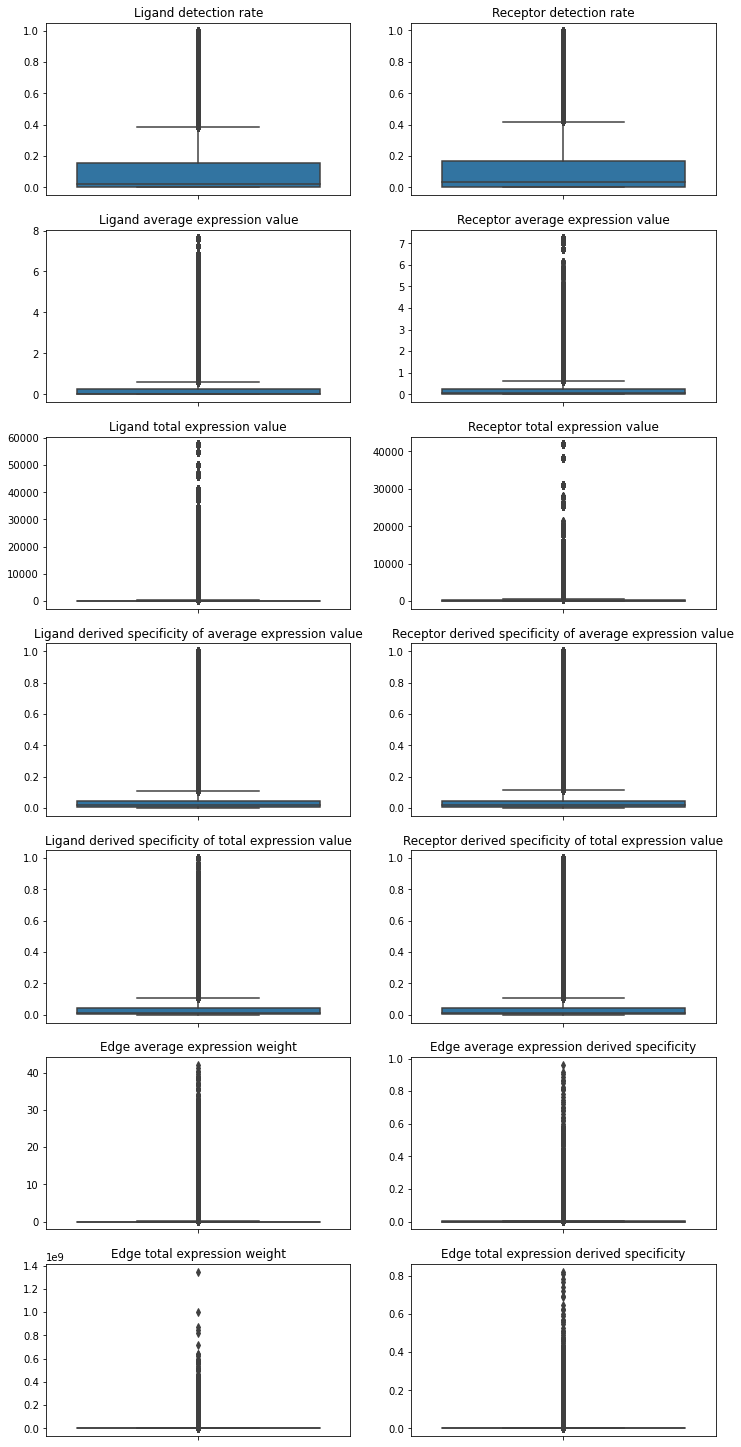

In [4]:
sns.reset_orig() # reset size of figure
columns = ['Ligand detection rate', 'Receptor detection rate',
           'Ligand average expression value', 'Receptor average expression value', 
           'Ligand total expression value','Receptor total expression value',
           'Ligand derived specificity of average expression value','Receptor derived specificity of average expression value',
           'Ligand derived specificity of total expression value', 'Receptor derived specificity of total expression value',          
           
           'Edge average expression weight',
           'Edge average expression derived specificity',
           'Edge total expression weight',
           'Edge total expression derived specificity']

fig, ax = plt.subplots(int(len(columns)/2), 2)
fig.set_size_inches(12, 26)
ax = ax.ravel()

for idx in range(len(columns)):
    sns.boxplot(ax=ax[idx], y=columns[idx], data=df).set(title=columns[idx], ylabel='');

##### ROI:

In [5]:
df.columns

Index(['Sending cluster', 'Ligand symbol', 'Receptor symbol', 'Target cluster',
       'Ligand-expressing cells', 'Ligand detection rate',
       'Ligand average expression value', 'Ligand total expression value',
       'Ligand derived specificity of average expression value',
       'Ligand derived specificity of total expression value',
       'Receptor-expressing cells', 'Receptor detection rate',
       'Receptor average expression value', 'Receptor total expression value',
       'Receptor derived specificity of average expression value',
       'Receptor derived specificity of total expression value',
       'Edge average expression weight',
       'Edge average expression derived specificity',
       'Edge total expression weight',
       'Edge total expression derived specificity'],
      dtype='object')

In [6]:
sort_by = 'Edge average expression weight'
# sort_by = 'Edge average expression derived specificity'
# sort_by = 'Edge total expression weight'
# sort_by = 'Edge total expression derived specificity'

avg_specificity_threshold  = 0 #0.01
total_specificity_threshold = 0 #0.02
detection_threshold = 0.7
avg_expression_threshold = 1

filter_GEP = False


################################ filter ################################

df_filtered = df[(df['Receptor detection rate']>detection_threshold) & 
                 (df['Ligand detection rate']>detection_threshold)]

df_filtered = df_filtered[(df_filtered['Receptor average expression value']>avg_expression_threshold) &
                          (df_filtered['Ligand average expression value']>avg_expression_threshold)]
# df_filtered = df_filtered[(df_filtered['Receptor total expression value']>avg_expression_threshold) &
#                           (df_filtered['Ligand total expression value']>avg_expression_threshold)]

df_filtered = df_filtered[(df_filtered['Receptor derived specificity of average expression value']>avg_specificity_threshold) &
                          (df_filtered['Ligand derived specificity of average expression value']>avg_specificity_threshold)]

df_filtered = df_filtered[(df_filtered['Receptor derived specificity of total expression value']>total_specificity_threshold) &
                          (df_filtered['Ligand derived specificity of total expression value']>total_specificity_threshold)]


if filter_GEP:
    print(f'GEP siganls are filtered out')
    df_filtered = df_filtered[df_filtered[['Sending cluster', 'Target cluster']].apply(lambda x: not 'GEP' in x['Sending cluster'] and not 'GEP' in x['Target cluster'], axis=1)]

print(f'Number of pairs in filtered df is: {len(df_filtered)}')
################################ show ################################



pd.set_option('display.max_rows', 10)
strong_signals_df = df_filtered.sort_values(sort_by, ascending = False).reset_index(drop=True)
strong_signals_df

Number of pairs in filtered df is: 3753


,Sending cluster,Ligand symbol,Receptor symbol,Target cluster,Ligand-expressing cells,Ligand detection rate,Ligand average expression value,Ligand total expression value,Ligand derived specificity of average expression value,Ligand derived specificity of total expression value,Receptor-expressing cells,Receptor detection rate,Receptor average expression value,Receptor total expression value,Receptor derived specificity of average expression value,Receptor derived specificity of total expression value,Edge average expression weight,Edge average expression derived specificity,Edge total expression weight,Edge total expression derived specificity
0,GEP_#18,MIF,CD74,Myeloid_cluster_1,5643,0.997349,5.785267,32733.040182,0.046097,0.114884,686,0.995646,7.267168,5007.078542,0.083078,0.038007,42.042505,0.003830,1.638969e+08,0.004366
1,GEP_#13,MIF,CD74,Myeloid_cluster_1,2946,0.990918,5.668784,16853.295504,0.045169,0.059150,686,0.995646,7.267168,5007.078542,0.083078,0.038007,41.196006,0.003753,8.438577e+07,0.002248
2,GEP_#18,MIF,CD74,Myeloid_cluster_7,5643,0.997349,5.785267,32733.040182,0.046097,0.114884,485,0.995893,6.995306,3406.714105,0.079970,0.025859,40.469713,0.003686,1.115121e+08,0.002971
3,GEP_#12,MIF,CD74,Myeloid_cluster_1,7434,0.995447,5.508015,41133.854818,0.043888,0.144369,686,0.995646,7.267168,5007.078542,0.083078,0.038007,40.027668,0.003646,2.059604e+08,0.005487
4,GEP_#13,MIF,CD74,Myeloid_cluster_7,2946,0.990918,5.668784,16853.295504,0.045169,0.059150,485,0.995893,6.995306,3406.714105,0.079970,0.025859,39.654881,0.003612,5.741436e+07,0.001530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,GEP_#11,DSC3,DSG2,GEP_#11,78,0.829787,1.018530,95.741827,0.920566,0.775378,76,0.808511,1.097377,103.153397,0.398215,0.018263,1.117711,0.366584,9.876095e+03,0.014161
3749,GEP_#4,GRN,TNFRSF1A,Myeloid_cluster_9,2363,0.764725,1.089482,3366.499399,0.028428,0.050078,940,0.763607,1.011293,1244.902125,0.048421,0.034820,1.101786,0.001376,4.190962e+06,0.001744
3750,GEP_#11,GRN,TNFRSF1A,Myeloid_cluster_9,77,0.819149,1.079144,101.439503,0.028158,0.001509,940,0.763607,1.011293,1244.902125,0.048421,0.034820,1.091331,0.001363,1.262823e+05,0.000053
3751,GEP_#11,ADAM9,ITGA3,GEP_#11,75,0.797872,1.073000,100.862024,0.119596,0.007585,74,0.787234,1.014601,95.372530,0.204871,0.009181,1.088668,0.024502,9.619466e+03,0.000070


# Conduct statistical tests to see diff between groups:

In [7]:

# LR_pairs = [tuple(v) for v in print_df[['Ligand symbol', 'Receptor symbol']].values.tolist()]
# unique_LR_paris = sorted(set(LR_pairs), key=LR_pairs.index)

# # print_df

# for LR_pair in unique_LR_paris[:1]:
#     print(LR_pair)

#     curr_pair_df = print_df[(print_df['Ligand symbol']==LR_pair[0]) & (print_df['Receptor symbol']==LR_pair[1])]
#     sending_clusters = list(set(curr_pair_df['Sending cluster'].tolist()))
#     target_clusters = list(set(curr_pair_df['Target cluster'].tolist()))

# target_clusters[2].split('_')    

In [8]:
EXPERIMENT_NUM = 1


if EXPERIMENT_NUM == 1:
    EXPERIMENT_NAME = r'NR_mucosal_vs_NR_cutaneous'
    FEATURE = 'Melanoma type' # 'response' | 'Melanoma type'
elif EXPERIMENT_NUM == 2:
    EXPERIMENT_NAME = r'NR_mucosal_vs_R_cutaneous'
    FEATURE = 'response'# 'response' | 'Melanoma type'
elif EXPERIMENT_NUM == 3:
    EXPERIMENT_NAME = r'NR_mucosal_vs_R_AND_NR_cutaneous'
    FEATURE = 'Melanoma type' # 'response' | 'Melanoma type'
if FEATURE == 'response':
    FEATURE_A = 'R'
    FEATURE_B = 'NR'
    FEATURE_G = 'not in use for now'
else:
    FEATURE_A = 'Cutaneous'
    FEATURE_B = 'Mucosal'
    FEATURE_G = 'other'    
    
melanoma_clinical_data = get_constant_cohort(EXPERIMENT_NUM) #get_clinical_data(71)#ICI=True, after_biopsy='ICI')
res_melanoma_clinical_data = melanoma_clinical_data.set_index('Patient id')
print(melanoma_clinical_data.iloc[:,:-1].head(5))
print(f'Num of samples in table is {len(melanoma_clinical_data)}')
print(res_melanoma_clinical_data[FEATURE].value_counts())

response_samples = melanoma_clinical_data[melanoma_clinical_data[FEATURE] == FEATURE_A]['Patient id'].tolist()
non_response_samples = melanoma_clinical_data[melanoma_clinical_data[FEATURE] == FEATURE_B]['Patient id'].tolist()
no_used_samples = melanoma_clinical_data[melanoma_clinical_data[FEATURE] == FEATURE_G]['Patient id'].tolist()

print(f'number {FEATURE_A} samples: {len(response_samples)}')
print(f'number {FEATURE_B} samples: {len(non_response_samples)}')
print(f'number no label samples: {len(no_used_samples)}')

Using clinical table in path:
 /storage/md_keren/shitay/Data/tables/clinical_tables/Melanoma_clinical_data_3.22_unprotected.xlsx

and labels:
/storage/md_keren/shitay/Data/tables/clinical_tables/clinical_labels.csv
  Patient id Melanoma type response prior to biopsy   after biopsy   ICI
0        M99       Mucosal       NR             ICI  other therapy  True
1       M106     Cutaneous       NR             ICI  other therapy  True
2       M107     Cutaneous       NR             ICI  other therapy  True
3       M111       Mucosal       NR             ICI  other therapy  True
4       M120     Cutaneous       NR             ICI  other therapy  True
Num of samples in table is 13
Cutaneous    9
Mucosal      4
Name: Melanoma type, dtype: int64
number Cutaneous samples: 9
number Mucosal samples: 4
number no label samples: 0


In [9]:
IMMUNE_CLUSTER_BARCODE_MAPPING_PATH = r'/storage/md_keren/shitay/outputs/clustering/immune/summary/subcohort_1.1.22_run_1.1.22/subcohort_immune_1.1.22_clusters_mapping.csv'
CD8_CLUSTER_BARCODE_MAPPING_PATH = r'/storage/md_keren/shitay/outputs/clustering/CD8/summary/subcohort_1.1.22_run_1.1.22/subcohort_CD8_1.1.22_clusters_mapping.csv'
MYELOID_CLUSTER_BARCODE_MAPPING_PATH = r'/storage/md_keren/shitay/outputs/clustering/myeloid/summary/subcohort_1.1.22_run_1.1.22/subcohort_myeloid_1.1.22_clusters_mapping.csv'
#######################################
immune_clusters_barcodes_mapping_df = pd.read_csv(IMMUNE_CLUSTER_BARCODE_MAPPING_PATH)
immune_clusters_barcodes_mapping_df = immune_clusters_barcodes_mapping_df[immune_clusters_barcodes_mapping_df["Sample"].isin(melanoma_clinical_data['Patient id'])]

CD8_clusters_barcodes_mapping_df = pd.read_csv(CD8_CLUSTER_BARCODE_MAPPING_PATH).drop(columns=['index', 'Unnamed: 0'])
CD8_clusters_barcodes_mapping_df = CD8_clusters_barcodes_mapping_df[CD8_clusters_barcodes_mapping_df["Sample"].isin(melanoma_clinical_data['Patient id'])]

myeloid_clusters_barcodes_mapping_df = pd.read_csv(MYELOID_CLUSTER_BARCODE_MAPPING_PATH).drop(columns=['index', 'Unnamed: 0'])
myeloid_clusters_barcodes_mapping_df = myeloid_clusters_barcodes_mapping_df[myeloid_clusters_barcodes_mapping_df["Sample"].isin(melanoma_clinical_data['Patient id'])]

In [10]:
EXEC_DIR = r'/storage/md_keren/shitay/outputs/cNMF/executions/tumor_runs/subcohort_1.1.22'
selected_K = 20
local_density_threshold = '0.10'
number_of_genes = 2000
n_replicates = 200
RUN_RANGE = '20'
N_PROG = 20

GEP_df, R_GEP_df, NR_GEP_df = get_GEP_dfs(melanoma_clinical_data,
                    EXEC_DIR,
                    RUN_RANGE,
                    selected_K,
                    number_of_genes,
                    n_replicates,
                    local_density_threshold,
                    FEATURE,
                    FEATURE_A,
                    FEATURE_B)
GEP_df = filter_contaminated_cells_out_of_GEP_DF(GEP_df, 14, contaminated_cells_path =r'/storage/md_keren/shitay/Data/tables/GEP/subcohort_1.1.22/contaminated_cells_list/GEP14_contaminated_cells.csv')
R_GEP_df = filter_contaminated_cells_out_of_GEP_DF(R_GEP_df, 14, contaminated_cells_path =r'/storage/md_keren/shitay/Data/tables/GEP/subcohort_1.1.22/contaminated_cells_list/GEP14_contaminated_cells.csv')
NR_GEP_df = filter_contaminated_cells_out_of_GEP_DF(NR_GEP_df, 14, contaminated_cells_path =r'/storage/md_keren/shitay/Data/tables/GEP/subcohort_1.1.22/contaminated_cells_list/GEP14_contaminated_cells.csv')

In [11]:
COHORT_PATH = r'/storage/md_keren/shitay/Data/droplet_seq/M97_M173/subcohort/normalized/16.3.22/subcohort_normalized_1.1.22_protein_coding_genes.pkl'
cohort = pickle.load(open(COHORT_PATH, 'rb'))

In [12]:
immune_cohort = cohort.filter_cells_by_property('is_immune', True)
tumor_cohort = cohort.filter_cells_by_property('is_cancer', True)
CD8_cohort = get_requested_subset(cohort, 'CYTOTOXIC_T_CELLS')
mye_cohort = get_requested_subset(cohort, 'MYELOIDS')


Will be performed on cytotoxic T cells
Will be performed on myeloids
IMMUNE CLUSTERING in path 	 /storage/md_keren/shitay/outputs/clustering/immune/summary/4.11.21/immune_kmeans_integrated_4.11.21_clusters_mapping.csv 	 is used for defining which cells are myeloids
Cluster 5 is defined to be myeloids


### Build cohorts by clusters and GEPs

In [13]:
GEP_indexes = list(GEP_df.columns[4:])
GEPS_dic = {g_i:{} for g_i in GEP_indexes}
for GEP_curr_index in GEP_indexes:
    R_cells_ids = R_GEP_df[R_GEP_df['associated program']==GEP_curr_index][['sample', 'barcode']]
    NR_cells_ids = NR_GEP_df[NR_GEP_df['associated program']==GEP_curr_index][['sample', 'barcode']]
    
    NR_cohort = tumor_cohort.get_subset_by_identifiers(NR_cells_ids['sample'], NR_cells_ids['barcode'])
    R_cohort = tumor_cohort.get_subset_by_identifiers(R_cells_ids['sample'], R_cells_ids['barcode'])
   
    GEPS_dic[GEP_curr_index]['R'] = R_cohort
    GEPS_dic[GEP_curr_index]['NR'] = NR_cohort

In [14]:
CD8_cluster_indexes = list(set(CD8_clusters_barcodes_mapping_df.Cluster))
CD8_dic = {c_i:{} for c_i in CD8_cluster_indexes}
R_CD8_clusters_df = CD8_clusters_barcodes_mapping_df[CD8_clusters_barcodes_mapping_df.Sample.isin(response_samples)]
NR_CD8_clusters_df = CD8_clusters_barcodes_mapping_df[CD8_clusters_barcodes_mapping_df.Sample.isin(non_response_samples)]


for cluster_curr_index in CD8_cluster_indexes:
    print(cluster_curr_index)
    R_cells_ids = R_CD8_clusters_df[R_CD8_clusters_df.Cluster == cluster_curr_index][['Sample', 'Barcode']]
    NR_cells_ids = NR_CD8_clusters_df[NR_CD8_clusters_df.Cluster == cluster_curr_index][['Sample', 'Barcode']]
    
    
    R_cohort = CD8_cohort.get_subset_by_identifiers(R_cells_ids['Sample'], R_cells_ids['Barcode'])
    NR_cohort = CD8_cohort.get_subset_by_identifiers(NR_cells_ids['Sample'], NR_cells_ids['Barcode'])

    CD8_dic[cluster_curr_index]['R'] = R_cohort
    CD8_dic[cluster_curr_index]['NR'] = NR_cohort

1
2
3
4
5


In [15]:
myeloid_cluster_indexes = list(set(myeloid_clusters_barcodes_mapping_df.Cluster))
myeloid_dic = {c_i:{} for c_i in myeloid_cluster_indexes}
R_myeloid_clusters_df = myeloid_clusters_barcodes_mapping_df[myeloid_clusters_barcodes_mapping_df.Sample.isin(response_samples)]
NR_myeloid_clusters_df = myeloid_clusters_barcodes_mapping_df[myeloid_clusters_barcodes_mapping_df.Sample.isin(non_response_samples)]


for cluster_curr_index in myeloid_cluster_indexes:
    print(cluster_curr_index)
    R_cells_ids = R_myeloid_clusters_df[R_myeloid_clusters_df.Cluster == cluster_curr_index][['Sample', 'Barcode']]
    NR_cells_ids = NR_myeloid_clusters_df[NR_myeloid_clusters_df.Cluster == cluster_curr_index][['Sample', 'Barcode']]
    
    
    R_cohort = mye_cohort.get_subset_by_identifiers(R_cells_ids['Sample'], R_cells_ids['Barcode'])
    NR_cohort = mye_cohort.get_subset_by_identifiers(NR_cells_ids['Sample'], NR_cells_ids['Barcode'])

    myeloid_dic[cluster_curr_index]['R'] = R_cohort
    myeloid_dic[cluster_curr_index]['NR'] = NR_cohort

1
2
3
4
5
6
7
8
9


#### Go through strong_signal_df

In [19]:
root_dic = {'GEP':GEPS_dic, 'Myeloid':myeloid_dic, 'CD8':CD8_dic}

In [60]:
edited_strong_signals_df = strong_signals_df.copy()

edited_strong_signals_df[f'Target cluster ({FEATURE_A}) - number of cells'] = None
edited_strong_signals_df[f'Target cluster ({FEATURE_B}) - number of cells'] = None
edited_strong_signals_df[f'Target cluster ({FEATURE_A}) - % cells expressing'] = None
edited_strong_signals_df[f'Target cluster ({FEATURE_B}) - % cells expressing'] = None
edited_strong_signals_df['Receptor - pval'] = None

edited_strong_signals_df[f'Sending cluster ({FEATURE_A}) - number of cells'] = None
edited_strong_signals_df[f'Sending cluster ({FEATURE_B}) - number of cells'] = None
edited_strong_signals_df[f'Sending cluster ({FEATURE_A}) - % cells expressing'] = None
edited_strong_signals_df[f'Sending cluster ({FEATURE_B}) - % cells expressing'] = None
edited_strong_signals_df['Ligand - pval'] = None



In [61]:
def get_statistics_of_exp(R_expression, NR_expression):
    R_n_cells = len(R_expression)
    NR_n_cells = len(NR_expression)
    R_n_cells_expressing = sum(R_expression > gene_expression_threshold)
    NR_n_cells_expressing = sum(NR_expression > gene_expression_threshold)
    R_per_expressing = R_n_cells_expressing/ R_n_cells if R_n_cells!=0 else 0
    NR_per_expressing = NR_n_cells_expressing / NR_n_cells if NR_n_cells!=0 else 0
    
    oddsratio, pvalue = stats.fisher_exact([[R_n_cells_expressing,
                                            NR_n_cells_expressing],
                                            [R_n_cells - R_n_cells_expressing,
                                                     NR_n_cells - NR_n_cells_expressing]])

    return R_n_cells, NR_n_cells, R_per_expressing, NR_per_expressing, pvalue

In [62]:
gene_expression_threshold = 1

for row_index, current_signal in edited_strong_signals_df.iterrows():


    if not current_signal['Ligand symbol'] in cohort.gene_names or not current_signal['Receptor symbol'] in cohort.gene_names:        
        continue
    ligand_gene_index = cohort.gene_names.index(current_signal['Ligand symbol'])
    receptor_gene_index = cohort.gene_names.index(current_signal['Receptor symbol'])


    cluster_name = current_signal['Sending cluster'].split('_')[0]
    if cluster_name=='GEP':
        cluster_idx = int(current_signal['Sending cluster'].split('_')[1][1:])
    else:
        cluster_idx = int(current_signal['Sending cluster'].split('_')[2])

    R_counts = root_dic[cluster_name][cluster_idx]['R'].counts
    NR_counts = root_dic[cluster_name][cluster_idx]['NR'].counts

    R_n_cells, NR_n_cells, R_per_expressing, NR_per_expressing, pval = get_statistics_of_exp(R_counts[:, ligand_gene_index], NR_counts[:, ligand_gene_index])

    edited_strong_signals_df.at[row_index, [f'Sending cluster ({FEATURE_A}) - number of cells']] =  R_n_cells
    edited_strong_signals_df.at[row_index, [f'Sending cluster ({FEATURE_B}) - number of cells']] = NR_n_cells
    edited_strong_signals_df.at[row_index, [f'Sending cluster ({FEATURE_A}) - % cells expressing']] = R_per_expressing
    edited_strong_signals_df.at[row_index, [f'Sending cluster ({FEATURE_B}) - % cells expressing']] = NR_per_expressing
    edited_strong_signals_df.at[row_index, ['Ligand - pval']] = pval


    cluster_name = current_signal['Target cluster'].split('_')[0]
    if cluster_name=='GEP':
        cluster_idx = int(current_signal['Target cluster'].split('_')[1][1:])
    else:
        cluster_idx = int(current_signal['Target cluster'].split('_')[2])

    R_counts = root_dic[cluster_name][cluster_idx]['R'].counts
    NR_counts = root_dic[cluster_name][cluster_idx]['NR'].counts

    R_n_cells, NR_n_cells, R_per_expressing, NR_per_expressing, pval = get_statistics_of_exp(R_counts[:, receptor_gene_index], NR_counts[:, receptor_gene_index])
    edited_strong_signals_df.at[row_index, [f'Target cluster ({FEATURE_A}) - number of cells']] = R_n_cells
    edited_strong_signals_df.at[row_index, [f'Target cluster ({FEATURE_B}) - number of cells']] = NR_n_cells
    edited_strong_signals_df.at[row_index, [f'Target cluster ({FEATURE_A}) - % cells expressing']] = R_per_expressing
    edited_strong_signals_df.at[row_index, [f'Target cluster ({FEATURE_B}) - % cells expressing']] = NR_per_expressing
    edited_strong_signals_df.at[row_index, ['Receptor - pval']] = pval



In [63]:
edited_strong_signals_df = edited_strong_signals_df[~((edited_strong_signals_df['Receptor - pval'].isnull()) | (edited_strong_signals_df['Ligand - pval'].isnull()))]

In [64]:
edited_strong_signals_df['Receptor - qval'] = multipletests_fdr(edited_strong_signals_df['Receptor - pval'])[1]
edited_strong_signals_df['Ligand - qval'] = multipletests_fdr(edited_strong_signals_df['Ligand - pval'])[1]


In [65]:
edited_strong_signals_df = edited_strong_signals_df[(edited_strong_signals_df['Receptor - qval'] < 0.05) | (edited_strong_signals_df['Ligand - qval']<0.05)]

In [85]:
edited_strong_signals_df = edited_strong_signals_df.iloc[:, [0, 3, 1, 2]+list(range(25,29))+list(range(20,24))+[31, 30]+list(range(4,19))+[29, 24]]

In [100]:
edited_strong_signals_df.to_excel(r'/storage/md_keren/shitay/garbage/dd3.xlsx')

In [102]:
# edited_strong_signals_df

# pairs of a specific group (NR_cutaneous/NR_mucosal/R_cutaneous):

In [36]:
groups = ['GEP_#13', 'Myeloid_cluster_4', 'Myeloid_cluster_5', 'CD8_cluster_1'] # NR_mucosal
# groups = ['GEP_#2', 'GEP_#17', 'CD8_cluster_3', 'CD8_cluster_4'] # NR_cutaneous
# groups = ['GEP_#18', 'Myeloid_cluster_2', 'Myeloid_cluster_7', 'Myeloid_cluster_9','CD8_cluster_5'] # R_cutaneous

two_sides = True
NUM_OF_ROWS = 10 # None

########################################
pd.set_option('display.max_rows', NUM_OF_ROWS)
if two_sides:
    res_df = print_df[print_df['Sending cluster'].isin(groups) & print_df['Target cluster'].isin(groups)]
else:
    res_df = print_df[print_df['Sending cluster'].isin(groups) | print_df['Target cluster'].isin(groups)]
res_df

,Sending cluster,Ligand symbol,Receptor symbol,Target cluster,Ligand-expressing cells,Ligand detection rate,Ligand average expression value,Ligand total expression value,Ligand derived specificity of average expression value,Ligand derived specificity of total expression value,Receptor-expressing cells,Receptor detection rate,Receptor average expression value,Receptor total expression value,Receptor derived specificity of average expression value,Receptor derived specificity of total expression value,Edge average expression weight,Edge average expression derived specificity,Edge total expression weight,Edge total expression derived specificity
126,GEP_#13,MIF,CD74,Myeloid_cluster_5,2946,0.990918,5.668784,16853.295504,0.045169,0.059150,702,0.955102,4.290558,3153.559941,0.049050,0.023937,24.322246,0.002216,5.314788e+07,0.001416
192,GEP_#13,MIF,CD74,CD8_cluster_1,2946,0.990918,5.668784,16853.295504,0.045169,0.059150,2866,0.870067,3.775395,12436.150095,0.043160,0.094397,21.401898,0.001950,2.095901e+08,0.005584
277,GEP_#13,MIF,CD74,Myeloid_cluster_4,2946,0.990918,5.668784,16853.295504,0.045169,0.059150,705,0.854545,3.293663,2717.272151,0.037653,0.020626,18.671066,0.001701,4.579499e+07,0.001220
438,Myeloid_cluster_4,MIF,CD74,Myeloid_cluster_5,788,0.955152,3.481804,2872.488705,0.027743,0.010082,702,0.955102,4.290558,3153.559941,0.049050,0.023937,14.938883,0.001361,9.058565e+06,0.000241
534,Myeloid_cluster_5,MIF,CD74,Myeloid_cluster_5,674,0.917007,3.148925,2314.459796,0.025091,0.008123,702,0.955102,4.290558,3153.559941,0.049050,0.023937,13.510644,0.001231,7.298788e+06,0.000194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,GEP_#13,PSAP,LRP1,Myeloid_cluster_5,2308,0.776320,1.668917,4961.689572,0.024804,0.041165,561,0.763265,1.877715,1380.120395,0.099282,0.062380,3.133750,0.002463,6.847729e+06,0.002568
3408,Myeloid_cluster_4,GRN,TNFRSF1B,Myeloid_cluster_5,640,0.775758,1.897211,1565.198715,0.049503,0.023283,517,0.703401,1.606960,1181.115540,0.103889,0.060918,3.048741,0.005143,1.848681e+06,0.001418
3432,GEP_#13,SPON2,ITGB2,Myeloid_cluster_4,2127,0.715439,1.641887,4881.329699,0.155244,0.174633,609,0.738182,1.823566,1504.441924,0.066413,0.039929,2.994089,0.010310,7.343677e+06,0.006973
3443,GEP_#13,CALR,LRP1,Myeloid_cluster_4,2264,0.761520,1.524391,4532.013639,0.027601,0.041345,632,0.766061,1.931662,1593.621528,0.102134,0.072030,2.944608,0.002819,7.222314e+06,0.002978


# DEBUG

#### 

Sending cluster -	The cluster that expresses the ligand.

Target cluster -	The cluster that expresses the receptor.

Ligand/receptor symbol -	The official gene symbol of the detected ligand/receptor.

Ligand/receptor-expressing cells -  	Number of cells ligand/receptor is detected in.

Ligand/receptor detection rate	-   The ratio of cells that expressed the ligand/receptor to total cells in the cluster.

Ligand/receptor average expression value -	The average expression level of the ligand/receptor in the cluster.

Ligand/receptor derived specificity of average expression value	-   The ratio of the average expression level of the ligand/receptor in the cluster to the sum of the average expression levels of the ligand/receptor in every cluster.

Ligand/receptor total expression value	-  The total expression level of the ligand/receptor in the cluster.

Ligand/receptor derived specificity of total expression value - 	The ratio of the total expression level of the ligand/receptor in the cluster to the sum of the total expression levels of the ligand/receptor in every cluster.

Edge average expression weight - 	The product of average expression levels of the ligand and the receptor in the corresponding cluster(s).

Edge average expression derived specificity - 	The product of the ligand and receptor derived specificity of average expression values.

Edge total expression weight -  	The product of total expression levels of the ligand and the receptor in the corresponding cluster(s)..

Edge total expression derived specificity - 	The product of the ligand and receptor derived specificity of total expression values.


In [576]:
sum(myeloid_clusters_barcodes_mapping_df.Cluster==2)

143

In [579]:
myeloid_clusters_barcodes_mapping_df = pd.read_csv(MYELOID_CLUSTER_BARCODE_MAPPING_PATH).drop(columns=['index', 'Unnamed: 0'])
# myeloid_clusters_barcodes_mapping_df = myeloid_clusters_barcodes_mapping_df[myeloid_clusters_barcodes_mapping_df["Sample"].isin(melanoma_clinical_data['Patient id'])]
myeloid_clusters_barcodes_mapping_df
sum(myeloid_clusters_barcodes_mapping_df.Cluster==2)

1514